In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
pd.options.display.max_columns = 100

In [ ]:
df_price = pd.read_csv('price_demand_data.csv')
df_price.head()


,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,1/01/2021 0:30,4179.21,LOW
1,VIC1,1/01/2021 1:00,4047.76,LOW
2,VIC1,1/01/2021 1:30,3934.70,LOW
3,VIC1,1/01/2021 2:00,3766.45,LOW
4,VIC1,1/01/2021 2:30,3590.37,LOW


In [ ]:
df_price["SETTLEMENTDATE"] = pd.to_datetime(df_price["SETTLEMENTDATE"])
df_price["SETTLEMENTDATE"] = df_price["SETTLEMENTDATE"].dt.date
df_price.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,2021-01-01,4179.21,LOW
1,VIC1,2021-01-01,4047.76,LOW
2,VIC1,2021-01-01,3934.70,LOW
3,VIC1,2021-01-01,3766.45,LOW
4,VIC1,2021-01-01,3590.37,LOW


In [ ]:
df_price["PRICECATEGORY"].value_counts()

LOW        7570
MEDIUM     3061
HIGH        777
EXTREME     256
Name: PRICECATEGORY, dtype: int64

In [ ]:
df_price['PRICECATEG'] = df_price['PRICECATEGORY'].replace(['LOW','MEDIUM','HIGH','EXTREME'],[0,1,2,3])

In [ ]:
df_price['PRICECATEGORY'].value_counts()

LOW        7570
MEDIUM     3061
HIGH        777
EXTREME     256
Name: PRICECATEGORY, dtype: int64

In [ ]:
df_price['PRICECATEG'].value_counts()

0    7570
1    3061
2     777
3     256
Name: PRICECATEG, dtype: int64

In [ ]:
df_price.loc[df_price['PRICECATEG'] == 1]

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,PRICECATEG
373,VIC1,2021-08-01,5352.25,MEDIUM,1
374,VIC1,2021-08-01,5321.80,MEDIUM,1
417,VIC1,2021-09-01,5452.03,MEDIUM,1
418,VIC1,2021-09-01,5653.12,MEDIUM,1
419,VIC1,2021-09-01,5812.76,MEDIUM,1
...,...,...,...,...,...
11659,VIC1,2021-08-31,4861.91,MEDIUM,1
11660,VIC1,2021-08-31,4748.74,MEDIUM,1
11661,VIC1,2021-08-31,4620.09,MEDIUM,1
11662,VIC1,2021-08-31,4834.00,MEDIUM,1


In [ ]:
#A model which predicts the maximum daily price category based on the provided weather data.

# for each day, find the maximum price category
df_price_max = df_price.groupby("SETTLEMENTDATE").max()
df_price_max.reset_index(inplace=True)


In [ ]:
df_price_max

,SETTLEMENTDATE,REGION,TOTALDEMAND,PRICECATEGORY,PRICECATEG
0,2021-01-01,VIC1,5019.64,LOW,0
1,2021-01-02,VIC1,5228.29,MEDIUM,1
2,2021-01-03,VIC1,5225.37,LOW,0
3,2021-01-04,VIC1,5807.02,MEDIUM,1
4,2021-01-05,VIC1,5261.09,MEDIUM,1
...,...,...,...,...,...
239,2021-12-04,VIC1,6415.58,MEDIUM,2
240,2021-12-05,VIC1,6406.00,MEDIUM,3
241,2021-12-06,VIC1,6062.58,MEDIUM,3
242,2021-12-07,VIC1,7095.00,MEDIUM,2


In [ ]:
df_price_max = pd.DataFrame(df_price.groupby("SETTLEMENTDATE").PRICECATEG.max())
#df_price_max.reset_index(inplace=True)

In [ ]:
df_price_max

,PRICECATEG
SETTLEMENTDATE,
2021-01-01,0
2021-01-02,1
2021-01-03,0
2021-01-04,1
2021-01-05,1
...,...
2021-12-04,2
2021-12-05,3
2021-12-06,3


In [ ]:
df_price_max.reset_index(inplace=True)

In [ ]:
df_price_max

,SETTLEMENTDATE,PRICECATEG
0,2021-01-01,0
1,2021-01-02,1
2,2021-01-03,0
3,2021-01-04,1
4,2021-01-05,1
...,...,...
239,2021-12-04,2
240,2021-12-05,3
241,2021-12-06,3
242,2021-12-07,2


In [ ]:


df_price_max["SETTLEMENTDATE"] = pd.to_datetime(df_price_max["SETTLEMENTDATE"])

In [ ]:
df_price_max["PRICECATEG"].value_counts()


1    77
3    64
2    61
0    42
Name: PRICECATEG, dtype: int64

In [ ]:
df_price_max.shape

(244, 2)

In [ ]:

df_weather = pd.read_csv('weather_data.csv')
df_weather.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,77.0,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,52.0,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,100.0,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,98.0,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,96.0,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3


In [ ]:
df_weather["Date"] = pd.to_datetime(df_weather["Date"], format="%d/%m/%Y")
df_weather.head()


,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,77.0,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2021-01-02,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,52.0,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,2021-01-03,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,100.0,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,2021-01-04,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,98.0,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,2021-01-05,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,96.0,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3


In [ ]:


df_weather.shape

(243, 21)

In [ ]:


# merge the weather data with the price data
df = pd.merge(df_price_max, df_weather, left_on="SETTLEMENTDATE", right_on="Date")

In [ ]:
to_drop = ["SETTLEMENTDATE", "Date"]
df.drop(to_drop, axis=1, inplace=True)

In [ ]:
df


,PRICECATEG,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,0,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,77.0,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,1,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,52.0,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,0,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,100.0,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,1,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,98.0,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,1,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,96.0,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,3,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,7.7,88.0,7,,Calm,1020.0,12.8,65,7.0,SSE,7,1017.4
208,1,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,9.1,80.0,1,N,7,1018.6,17.4,31,3.0,NNW,24,1013.5
209,3,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,10.6,79.0,7,N,13,1011.4,12.8,84,7.0,S,6,1010.4
210,2,6.4,17.6,4.0,1.4,7.4,NNW,50.0,14:04,11.1,70.0,7,N,15,1016.1,16.8,45,1.0,NNW,28,1013.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 211
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PRICECATEG                         212 non-null    int64  
 1   Minimum temperature (°C)           211 non-null    float64
 2   Maximum temperature (°C)           211 non-null    float64
 3   Rainfall (mm)                      211 non-null    float64
 4   Evaporation (mm)                   212 non-null    float64
 5   Sunshine (hours)                   212 non-null    float64
 6   Direction of maximum wind gust     209 non-null    object 
 7   Speed of maximum wind gust (km/h)  209 non-null    float64
 8   Time of maximum wind gust          209 non-null    object 
 9   9am Temperature (°C)               211 non-null    float64
 10  9am relative humidity (%)          211 non-null    float64
 11  9am cloud amount (oktas)           212 non-null    int64  

In [ ]:

# display categorical columns
df[df.select_dtypes(include=['object']).columns]

,Direction of maximum wind gust,Time of maximum wind gust,9am wind direction,9am wind speed (km/h),3pm wind direction,3pm wind speed (km/h)
0,NNE,13:14,N,2,E,13
1,NNW,8:22,NNW,17,SW,4
2,WSW,17:55,WSW,4,SSW,2
3,SSE,16:03,SSE,11,SSW,17
4,SSE,11:02,SSE,13,SSE,19
...,...,...,...,...,...,...
207,SSW,12:18,,Calm,SSE,7
208,N,13:14,N,7,NNW,24
209,NNE,1:50,N,13,S,6
210,NNW,14:04,N,15,NNW,28


In [ ]:
df[df.select_dtypes(include=['object']).columns]

,Direction of maximum wind gust,Time of maximum wind gust,9am wind direction,9am wind speed (km/h),3pm wind direction,3pm wind speed (km/h)
0,NNE,13:14,N,2,E,13
1,NNW,8:22,NNW,17,SW,4
2,WSW,17:55,WSW,4,SSW,2
3,SSE,16:03,SSE,11,SSW,17
4,SSE,11:02,SSE,13,SSE,19
...,...,...,...,...,...,...
207,SSW,12:18,,Calm,SSE,7
208,N,13:14,N,7,NNW,24
209,NNE,1:50,N,13,S,6
210,NNW,14:04,N,15,NNW,28


In [ ]:
df['9am wind speed (km/h)']= pd.to_numeric(df['9am wind speed (km/h)'], errors='coerce')
df['3pm wind speed (km/h)']= pd.to_numeric(df['3pm wind speed (km/h)'], errors='coerce')

In [ ]:
to_drop = ['Time of maximum wind gust']
df.drop(to_drop, axis=1, inplace=True)

In [ ]:



df


,PRICECATEG,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,0,15.6,29.9,0.0,2.8,9.3,NNE,31.0,19.2,77.0,6,N,2.0,1018.8,28.1,43,5.0,E,13.0,1015.3
1,1,18.4,29.0,0.0,9.4,1.3,NNW,30.0,23.3,52.0,7,NNW,17.0,1013.3,28.7,38,7.0,SW,4.0,1008.5
2,0,17.0,26.2,12.6,4.8,7.1,WSW,33.0,18.3,100.0,8,WSW,4.0,1007.7,23.5,59,4.0,SSW,2.0,1005.2
3,1,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16.2,98.0,8,SSE,11.0,1010.0,18.2,82,8.0,SSW,17.0,1011.0
4,1,15.9,19.1,11.2,1.0,0.0,SSE,35.0,17.2,96.0,8,SSE,13.0,1012.5,18.2,82,8.0,SSE,19.0,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,3,4.6,13.6,0.0,1.2,3.8,SSW,15.0,7.7,88.0,7,,NaN,1020.0,12.8,65,7.0,SSE,7.0,1017.4
208,1,5.3,17.8,0.0,1.6,9.6,N,39.0,9.1,80.0,1,N,7.0,1018.6,17.4,31,3.0,NNW,24.0,1013.5
209,3,9.1,16.2,0.6,6.4,4.3,NNE,33.0,10.6,79.0,7,N,13.0,1011.4,12.8,84,7.0,S,6.0,1010.4
210,2,6.4,17.6,4.0,1.4,7.4,NNW,50.0,11.1,70.0,7,N,15.0,1016.1,16.8,45,1.0,NNW,28.0,1013.2


In [ ]:
# fill missing values with the mean
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# fill missing string with mode
cat_columns = df.select_dtypes(include=['object']).columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 211
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PRICECATEG                         212 non-null    int64  
 1   Minimum temperature (°C)           212 non-null    float64
 2   Maximum temperature (°C)           212 non-null    float64
 3   Rainfall (mm)                      212 non-null    float64
 4   Evaporation (mm)                   212 non-null    float64
 5   Sunshine (hours)                   212 non-null    float64
 6   Direction of maximum wind gust     212 non-null    object 
 7   Speed of maximum wind gust (km/h)  212 non-null    float64
 8   9am Temperature (°C)               212 non-null    float64
 9   9am relative humidity (%)          212 non-null    float64
 10  9am cloud amount (oktas)           212 non-null    int64  
 11  9am wind direction                 212 non-null    object 

In [ ]:





X = df.drop("PRICECATEG", axis=1)
y = df["PRICECATEG"]

In [ ]:
X

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,15.6,29.9,0.0,2.8,9.3,NNE,31.0,19.2,77.0,6,N,2.000000,1018.800000,28.1,43,5.0,E,13.0,1015.3
1,18.4,29.0,0.0,9.4,1.3,NNW,30.0,23.3,52.0,7,NNW,17.000000,1013.300000,28.7,38,7.0,SW,4.0,1008.5
2,17.0,26.2,12.6,4.8,7.1,WSW,33.0,18.3,100.0,8,WSW,4.000000,1007.700000,23.5,59,4.0,SSW,2.0,1005.2
3,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16.2,98.0,8,SSE,11.000000,1010.000000,18.2,82,8.0,SSW,17.0,1011.0
4,15.9,19.1,11.2,1.0,0.0,SSE,35.0,17.2,96.0,8,SSE,13.000000,1012.500000,18.2,82,8.0,SSE,19.0,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,4.6,13.6,0.0,1.2,3.8,SSW,15.0,7.7,88.0,7,,10.361809,1020.000000,12.8,65,7.0,SSE,7.0,1017.4
208,5.3,17.8,0.0,1.6,9.6,N,39.0,9.1,80.0,1,N,7.000000,1018.600000,17.4,31,3.0,NNW,24.0,1013.5
209,9.1,16.2,0.6,6.4,4.3,NNE,33.0,10.6,79.0,7,N,13.000000,1011.400000,12.8,84,7.0,S,6.0,1010.4
210,6.4,17.6,4.0,1.4,7.4,NNW,50.0,11.1,70.0,7,N,15.000000,1016.100000,16.8,45,1.0,NNW,28.0,1013.2


In [ ]:




y

0      0
1      1
2      0
3      1
4      1
      ..
207    3
208    1
209    3
210    2
211    1
Name: PRICECATEG, Length: 212, dtype: int64

In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder

cat_columns = X.select_dtypes(include=['object']).columns

for col in cat_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [ ]:





X

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,15.6,29.9,0.0,2.8,9.3,4,31.0,19.2,77.0,6,4,2.000000,1018.800000,28.1,43,5.0,1,13.0,1015.3
1,18.4,29.0,0.0,9.4,1.3,5,30.0,23.3,52.0,7,7,17.000000,1013.300000,28.7,38,7.0,13,4.0,1008.5
2,17.0,26.2,12.6,4.8,7.1,14,33.0,18.3,100.0,8,16,4.000000,1007.700000,23.5,59,4.0,12,2.0,1005.2
3,16.0,18.6,2.6,3.8,0.0,9,41.0,16.2,98.0,8,11,11.000000,1010.000000,18.2,82,8.0,12,17.0,1011.0
4,15.9,19.1,11.2,1.0,0.0,9,35.0,17.2,96.0,8,11,13.000000,1012.500000,18.2,82,8.0,11,19.0,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,4.6,13.6,0.0,1.2,3.8,10,15.0,7.7,88.0,7,0,10.361809,1020.000000,12.8,65,7.0,11,7.0,1017.4
208,5.3,17.8,0.0,1.6,9.6,2,39.0,9.1,80.0,1,4,7.000000,1018.600000,17.4,31,3.0,7,24.0,1013.5
209,9.1,16.2,0.6,6.4,4.3,4,33.0,10.6,79.0,7,4,13.000000,1011.400000,12.8,84,7.0,9,6.0,1010.4
210,6.4,17.6,4.0,1.4,7.4,5,50.0,11.1,70.0,7,4,15.000000,1016.100000,16.8,45,1.0,7,28.0,1013.2


In [ ]:
df

,PRICECATEG,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,0,15.6,29.9,0.0,2.8,9.3,NNE,31.0,19.2,77.0,6,N,2.000000,1018.800000,28.1,43,5.0,E,13.0,1015.3
1,1,18.4,29.0,0.0,9.4,1.3,NNW,30.0,23.3,52.0,7,NNW,17.000000,1013.300000,28.7,38,7.0,SW,4.0,1008.5
2,0,17.0,26.2,12.6,4.8,7.1,WSW,33.0,18.3,100.0,8,WSW,4.000000,1007.700000,23.5,59,4.0,SSW,2.0,1005.2
3,1,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16.2,98.0,8,SSE,11.000000,1010.000000,18.2,82,8.0,SSW,17.0,1011.0
4,1,15.9,19.1,11.2,1.0,0.0,SSE,35.0,17.2,96.0,8,SSE,13.000000,1012.500000,18.2,82,8.0,SSE,19.0,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,3,4.6,13.6,0.0,1.2,3.8,SSW,15.0,7.7,88.0,7,,10.361809,1020.000000,12.8,65,7.0,SSE,7.0,1017.4
208,1,5.3,17.8,0.0,1.6,9.6,N,39.0,9.1,80.0,1,N,7.000000,1018.600000,17.4,31,3.0,NNW,24.0,1013.5
209,3,9.1,16.2,0.6,6.4,4.3,NNE,33.0,10.6,79.0,7,N,13.000000,1011.400000,12.8,84,7.0,S,6.0,1010.4
210,2,6.4,17.6,4.0,1.4,7.4,NNW,50.0,11.1,70.0,7,N,15.000000,1016.100000,16.8,45,1.0,NNW,28.0,1013.2


In [ ]:
df['Avg Temp'] = pd.DataFrame((df['Minimum temperature (°C)'] + df['Maximum temperature (°C)'])/2)

In [ ]:
df['AvgdayTemp'] = pd.DataFrame((df['3pm Temperature (°C)'] + df['9am Temperature (°C)'])/2)

In [ ]:
df['Avghumidity']= pd.DataFrame((df['9am relative humidity (%)'] + df['3pm relative humidity (%)'])/2)

In [ ]:







df['Vartoavgmaxtemp'] = pd.DataFrame((df['Maximum temperature (°C)'] - df['Maximum temperature (°C)'].mean()).abs())

In [ ]:
df

,PRICECATEG,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Avg Temp,AvgdayTemp,Avghumidity,Vartoavgmaxtemp
0,0,15.6,29.9,0.0,2.8,9.3,NNE,31.0,19.2,77.0,6,N,2.000000,1018.800000,28.1,43,5.0,E,13.0,1015.3,22.75,23.65,60.0,10.57346
1,1,18.4,29.0,0.0,9.4,1.3,NNW,30.0,23.3,52.0,7,NNW,17.000000,1013.300000,28.7,38,7.0,SW,4.0,1008.5,23.70,26.00,45.0,9.67346
2,0,17.0,26.2,12.6,4.8,7.1,WSW,33.0,18.3,100.0,8,WSW,4.000000,1007.700000,23.5,59,4.0,SSW,2.0,1005.2,21.60,20.90,79.5,6.87346
3,1,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16.2,98.0,8,SSE,11.000000,1010.000000,18.2,82,8.0,SSW,17.0,1011.0,17.30,17.20,90.0,0.72654
4,1,15.9,19.1,11.2,1.0,0.0,SSE,35.0,17.2,96.0,8,SSE,13.000000,1012.500000,18.2,82,8.0,SSE,19.0,1013.3,17.50,17.70,89.0,0.22654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,3,4.6,13.6,0.0,1.2,3.8,SSW,15.0,7.7,88.0,7,,10.361809,1020.000000,12.8,65,7.0,SSE,7.0,1017.4,9.10,10.25,76.5,5.72654
208,1,5.3,17.8,0.0,1.6,9.6,N,39.0,9.1,80.0,1,N,7.000000,1018.600000,17.4,31,3.0,NNW,24.0,1013.5,11.55,13.25,55.5,1.52654
209,3,9.1,16.2,0.6,6.4,4.3,NNE,33.0,10.6,79.0,7,N,13.000000,1011.400000,12.8,84,7.0,S,6.0,1010.4,12.65,11.70,81.5,3.12654
210,2,6.4,17.6,4.0,1.4,7.4,NNW,50.0,11.1,70.0,7,N,15.000000,1016.100000,16.8,45,1.0,NNW,28.0,1013.2,12.00,13.95,57.5,1.72654


In [ ]:




corr_matrix = df.corr()

In [ ]:
corr_matrix['PRICECATEG'].sort_values(ascending=False)

PRICECATEG                           1.000000
Avghumidity                          0.261211
9am relative humidity (%)            0.234860
3pm relative humidity (%)            0.199015
9am MSL pressure (hPa)               0.150418
3pm cloud amount (oktas)             0.138527
3pm MSL pressure (hPa)               0.130284
9am wind speed (km/h)                0.026492
Vartoavgmaxtemp                     -0.011280
9am cloud amount (oktas)            -0.013437
Rainfall (mm)                       -0.067422
3pm wind speed (km/h)               -0.130714
Speed of maximum wind gust (km/h)   -0.131190
Sunshine (hours)                    -0.225787
Evaporation (mm)                    -0.422854
Minimum temperature (°C)            -0.432326
9am Temperature (°C)                -0.442047
Maximum temperature (°C)            -0.442108
3pm Temperature (°C)                -0.459555
Avg Temp                            -0.474791
AvgdayTemp                          -0.484543
Name: PRICECATEG, dtype: float64

In [ ]:




#A strong negative correlation between 3pm temperature,maximum temperature,9am temperature,minimum temperature,Evaporation
#Sunshine hours.
#Positive correlation: 9am relative humidity (%),3pm relative humidity (%)

In [ ]:

to_drop = ['9am MSL pressure (hPa)','3pm cloud amount (oktas)','9am relative humidity (%)','3pm relative humidity (%)',
          '3pm MSL pressure (hPa)','9am wind speed (km/h)','Vartoavgmaxtemp','9am cloud amount (oktas)','Rainfall (mm)',
          '3pm wind speed (km/h)','Speed of maximum wind gust (km/h)']
X = df.drop(to_drop, axis=1)

In [ ]:

X

,PRICECATEG,Minimum temperature (°C),Maximum temperature (°C),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,9am Temperature (°C),9am wind direction,3pm Temperature (°C),3pm wind direction,Avg Temp,AvgdayTemp,Avghumidity
0,0,15.6,29.9,2.8,9.3,NNE,19.2,N,28.1,E,22.75,23.65,60.0
1,1,18.4,29.0,9.4,1.3,NNW,23.3,NNW,28.7,SW,23.70,26.00,45.0
2,0,17.0,26.2,4.8,7.1,WSW,18.3,WSW,23.5,SSW,21.60,20.90,79.5
3,1,16.0,18.6,3.8,0.0,SSE,16.2,SSE,18.2,SSW,17.30,17.20,90.0
4,1,15.9,19.1,1.0,0.0,SSE,17.2,SSE,18.2,SSE,17.50,17.70,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,3,4.6,13.6,1.2,3.8,SSW,7.7,,12.8,SSE,9.10,10.25,76.5
208,1,5.3,17.8,1.6,9.6,N,9.1,N,17.4,NNW,11.55,13.25,55.5
209,3,9.1,16.2,6.4,4.3,NNE,10.6,N,12.8,S,12.65,11.70,81.5
210,2,6.4,17.6,1.4,7.4,NNW,11.1,N,16.8,NNW,12.00,13.95,57.5


In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder

cat_columns = X.select_dtypes(include=['object']).columns

for col in cat_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [ ]:
corr_matrix1 = X.corr()

In [ ]:
corr_matrix1['PRICECATEG'].sort_values(ascending=False)

PRICECATEG                         1.000000
Avghumidity                        0.261211
Direction of maximum wind gust    -0.038461
3pm wind direction                -0.114437
9am wind direction                -0.123607
Sunshine (hours)                  -0.225787
Evaporation (mm)                  -0.422854
Minimum temperature (°C)          -0.432326
9am Temperature (°C)              -0.442047
Maximum temperature (°C)          -0.442108
3pm Temperature (°C)              -0.459555
Avg Temp                          -0.474791
AvgdayTemp                        -0.484543
Name: PRICECATEG, dtype: float64

In [ ]:


#avoid wind
X.drop('3pm wind direction',axis=1, inplace = True)

In [ ]:
X.drop('9am wind direction',axis=1, inplace = True)

In [ ]:



X.drop('Direction of maximum wind gust ',axis=1, inplace = True)

In [ ]:
X

,PRICECATEG,Minimum temperature (°C),Maximum temperature (°C),Evaporation (mm),Sunshine (hours),9am Temperature (°C),3pm Temperature (°C),Avg Temp,AvgdayTemp,Avghumidity
0,0,15.6,29.9,2.8,9.3,19.2,28.1,22.75,23.65,60.0
1,1,18.4,29.0,9.4,1.3,23.3,28.7,23.70,26.00,45.0
2,0,17.0,26.2,4.8,7.1,18.3,23.5,21.60,20.90,79.5
3,1,16.0,18.6,3.8,0.0,16.2,18.2,17.30,17.20,90.0
4,1,15.9,19.1,1.0,0.0,17.2,18.2,17.50,17.70,89.0
...,...,...,...,...,...,...,...,...,...,...
207,3,4.6,13.6,1.2,3.8,7.7,12.8,9.10,10.25,76.5
208,1,5.3,17.8,1.6,9.6,9.1,17.4,11.55,13.25,55.5
209,3,9.1,16.2,6.4,4.3,10.6,12.8,12.65,11.70,81.5
210,2,6.4,17.6,1.4,7.4,11.1,16.8,12.00,13.95,57.5


In [ ]:


X.drop('PRICECATEG',axis=1, inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [ ]:


# replace Low to 0, Medium to 1, High to 2
#y_train = y_train.replace({'LOW': 0, 'MEDIUM': 1, 'HIGH': 2})
#y_test = y_test.replace({'LOW': 0, 'MEDIUM': 1, 'HIGH': 2})

In [ ]:
import warnings
warnings.filterwarnings('ignore')


# KNN k-fold cv

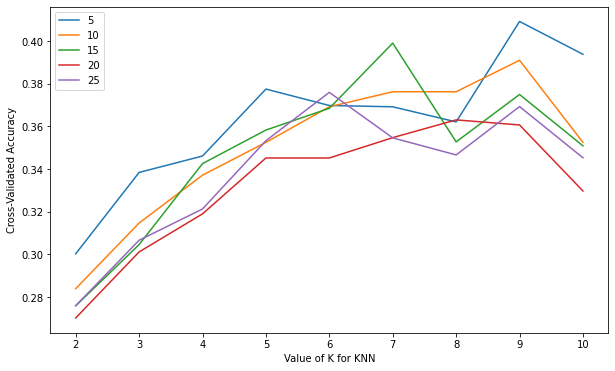

          5         10        15        20        25
2   0.300308  0.283974  0.275926  0.270238     0.276
3   0.338462  0.314744   0.30463   0.30119  0.306667
4   0.346154  0.337179  0.342593  0.319048  0.321333
5   0.377538  0.352564  0.358333  0.345238  0.353333
6   0.369846  0.369231  0.368519  0.345238     0.376
7   0.369231  0.376282  0.399074  0.354762  0.354667
8   0.362154  0.376282  0.352778  0.363095  0.346667
9   0.409231  0.391026     0.375  0.360714  0.369333
10  0.393846  0.352564  0.350926  0.329762  0.345333


In [ ]:
# knn k-fold from k=1 to k=20
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

# prepare dataframes to store results
k_range = range(2,11)
folds = [5,10,15,20,25]
k_scores = pd.DataFrame(index=k_range, columns=folds)
# loop through k and folds
for k in k_range:
    for fold in folds:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=fold, scoring='accuracy')
        k_scores.loc[k,fold] = scores.mean()
# plot the results
k_scores.plot(figsize=(10,6))
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
# print the results
print(k_scores)

In [ ]:
X_train

,Minimum temperature (°C),Maximum temperature (°C),Evaporation (mm),Sunshine (hours),9am Temperature (°C),3pm Temperature (°C),Avg Temp,AvgdayTemp,Avghumidity
141,9.7,16.4,1.4,1.6,11.0,15.9,13.05,13.45,73.0
111,10.5,21.5,2.4,3.6,13.9,20.2,16.00,17.05,64.0
132,5.7,15.7,4.0,1.3,9.2,15.3,10.70,12.25,54.0
2,17.0,26.2,4.8,7.1,18.3,23.5,21.60,20.90,79.5
77,9.8,18.9,3.6,10.2,11.5,18.5,14.35,15.00,72.0
...,...,...,...,...,...,...,...,...,...
106,13.7,26.0,6.4,3.8,17.5,25.3,19.85,21.40,47.5
14,14.1,22.6,5.6,9.0,15.9,20.6,18.35,18.25,67.0
92,13.1,18.8,3.2,0.7,14.9,17.5,15.95,16.20,70.5
179,8.1,16.4,1.0,2.9,12.4,15.8,12.25,14.10,68.5


In [ ]:
y_train

141    2
111    3
132    0
2      0
77     2
      ..
106    0
14     0
92     3
179    2
102    3
Name: PRICECATEG, Length: 127, dtype: int64

In [2]:
# decision tree with depth from 2 to 12 and folds [5,10,15,20,25]
from sklearn.tree import DecisionTreeClassifier

# prepare dataframes to store results
depth_range = range(2,13)
folds = [5,10,15,20,25]
depth_scores = pd.DataFrame(index=depth_range, columns=folds)
# loop through depth and folds
for depth in depth_range:
    for fold in folds:
        dt = DecisionTreeClassifier(max_depth=depth)
        scores = cross_val_score(dt, X_train, y_train, cv=fold, scoring='accuracy')
        depth_scores.loc[depth,fold] = scores.mean()
# plot the results
depth_scores.plot(figsize=(10,6))
plt.xlabel('Value of Depth for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
# print the results
print(depth_scores)


NameError: ignored

In [ ]:
!pip3 install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
y_train.value_counts()

1    36
3    34
2    30
0    27
Name: PRICECATEG, dtype: int64

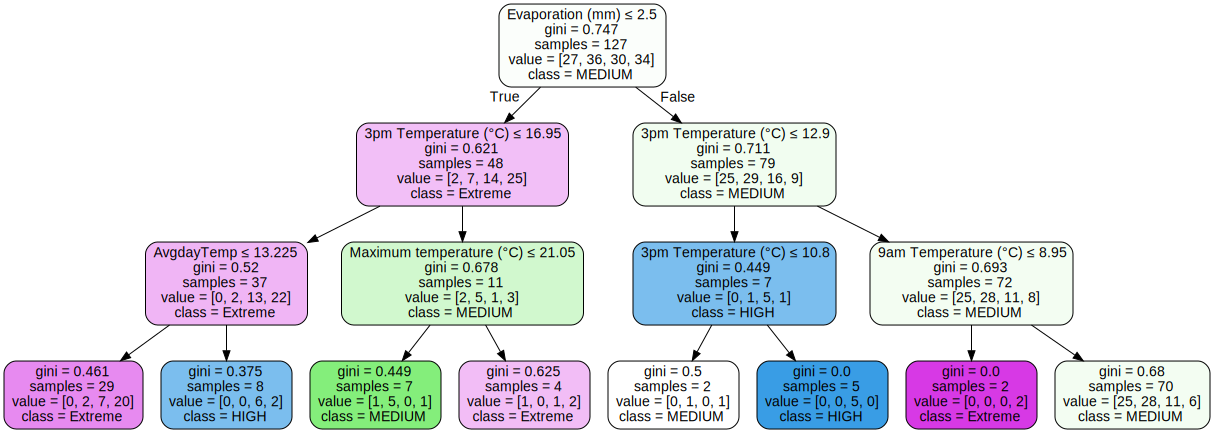

In [ ]:
# build decision tree with depth 3 and plot the tree
from sklearn.tree import export_graphviz
import graphviz
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
dot_data = export_graphviz(dt, out_file=None, feature_names=X_train.columns, class_names=['LOW','MEDIUM','HIGH', 'Extreme'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)


Accuracy:  0.4235294117647059
Confusion Matrix:  [[ 9  4  0  1]
 [ 7 14  1  3]
 [ 3 15  4  2]
 [ 2  6  5  9]]
Classification Report:                precision    recall  f1-score   support

           0       0.43      0.64      0.51        14
           1       0.36      0.56      0.44        25
           2       0.40      0.17      0.24        24
           3       0.60      0.41      0.49        22

    accuracy                           0.42        85
   macro avg       0.45      0.44      0.42        85
weighted avg       0.44      0.42      0.41        85



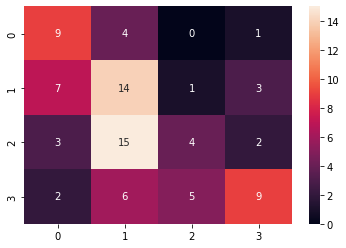

In [ ]:
#K-Nearest Neighbour classification

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy: ", accuracy_score(y_test, y_pred))

print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

print("Classification Report: ", classification_report(y_test, y_pred))


# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()




Accuracy:  0.3764705882352941
Confusion Matrix:  [[ 6  3  2  3]
 [ 7 13  1  4]
 [ 5  6  8  5]
 [ 2  4 11  5]]
Classification Report:                precision    recall  f1-score   support

           0       0.30      0.43      0.35        14
           1       0.50      0.52      0.51        25
           2       0.36      0.33      0.35        24
           3       0.29      0.23      0.26        22

    accuracy                           0.38        85
   macro avg       0.36      0.38      0.37        85
weighted avg       0.38      0.38      0.37        85



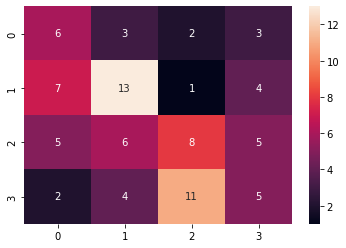

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

print("Classification Report: ", classification_report(y_test, y_pred))


# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()


